# K-Means Clustering

An algorithm capable of clustering a dataset of separate 'blobs' of data together quickly and efficiently.

In [77]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=5, cluster_std=0.9)

In [78]:
k = 5  # Number of clusters to be found
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [79]:
y_pred

array([1, 4, 1, 1, 0, 1, 3, 0, 0, 0, 4, 2, 2, 4, 2, 2, 1, 3, 4, 4, 0, 2,
       3, 3, 4, 4, 3, 1, 4, 2, 1, 4, 4, 2, 1, 3, 3, 0, 4, 4, 2, 4, 1, 1,
       4, 0, 3, 1, 2, 1, 3, 0, 3, 0, 2, 0, 2, 2, 3, 1, 3, 1, 3, 1, 2, 0,
       3, 2, 4, 4, 4, 4, 2, 3, 4, 3, 2, 1, 2, 2, 0, 4, 1, 0, 3, 3, 3, 0,
       3, 3, 1, 2, 0, 0, 0, 2, 4, 2, 3, 1, 4, 4, 0, 2, 1, 2, 1, 0, 3, 1,
       1, 0, 0, 3, 0, 1, 4, 2, 1, 2, 0, 3, 2, 1, 4, 1, 3, 3, 4, 3, 1, 4,
       0, 4, 3, 0, 2, 3, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 3, 2, 4, 2,
       1, 0, 2, 3, 0, 4, 2, 2, 0, 3, 1, 3, 0, 1, 3, 2, 3, 0, 0, 1, 4, 3,
       2, 1, 4, 0, 0, 4, 4, 1, 1, 1, 3, 2, 2, 2, 1, 3, 4, 0, 3, 3, 1, 4,
       1, 1, 3, 2, 2, 2, 4, 2, 2, 1, 1, 0, 1, 2, 3, 0, 3, 2, 3, 4, 4, 1,
       3, 1, 4, 1, 3, 3, 1, 2, 4, 4, 2, 0, 4, 3, 3, 3, 3, 1, 4, 2, 0, 3,
       3, 1, 3, 1, 3, 1, 1, 2, 1, 2, 2, 3, 0, 1, 3, 4, 1, 0, 1, 3, 0, 2,
       4, 1, 3, 1, 4, 0, 3, 0, 2, 4, 4, 2, 0, 2, 2, 3, 2, 3, 2, 0, 4, 3,
       0, 4, 2, 4, 4, 0, 3, 1, 4, 4, 4, 0, 0, 2], d

In [80]:
y_pred is kmeans.labels_

True

In [81]:
kmeans.cluster_centers_

array([[-8.59513241, -2.62101288],
       [ 9.11817141,  4.99873316],
       [ 4.15466655, -7.15176881],
       [-7.65975355, -0.70086834],
       [10.38240674,  5.73022836]])

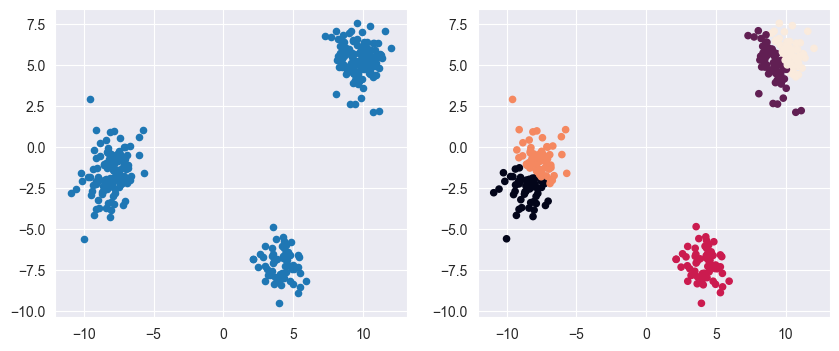

In [82]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], s=20)

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20)

In [83]:
X_new = np.array([[8, -2], [-2, 8], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 3, 3, 3], dtype=int32)

In [84]:
kmeans.transform(X_new).round(2) # Shows distances to nearest centroid

array([[16.61,  7.09,  6.43, 15.71,  8.09],
       [12.5 , 11.52, 16.35, 10.38, 12.59],
       [ 7.93, 12.28, 12.42,  5.95, 13.66],
       [ 7.58, 12.37, 12.01,  5.65, 13.77]])

The following is good for understanding up-to-date methods

### K-Means++

1. Take one centroid **$c^{(1)}$**, chosen uniformly at random from the dataset
2. Take a new centroid **$c^{(i)}$**, choosing an instance **$x^{(i)}$** with probability $D(x^{(i)})^2 / \sum_{j=1}^m D(x^{(j)})^2$, where $D(x^{(i)})$ is the distance between $x^{i}$ and closest centroid.
3. Repeat previous steps until all $k$ centroids have been chosen

In [85]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
minibatch_kmeans.fit(X)

,n_clusters,5
,init,'k-means++'
,max_iter,100
,batch_size,1024
,verbose,0
,compute_labels,True
,random_state,42
,tol,0.0
,max_no_improvement,10
,init_size,None
,n_init,'auto'


### Silhouette Score

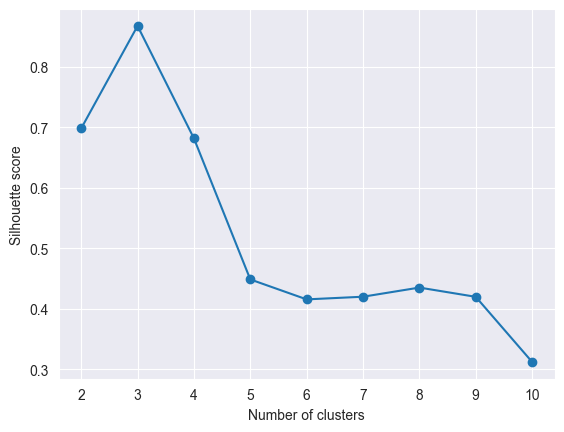

In [101]:
from sklearn.metrics import silhouette_score
k = 10

scores = []
for n_clusters in range(2, k + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)

plt.plot(range(2, k + 1),scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()